In [19]:
import numpy as np
from scipy.misc import comb
from scipy import special
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
def chooseln(N, k):
      return special.gammaln(N+1) - special.gammaln(N-k+1) - special.gammaln(k+1)

In [230]:
def likelihood(s,N,p):
    T = np.sum(s)
    k = len(s)
    if N >= s.max():
        return np.prod(comb(N,s)) * p**T * (1 - p)**(N*k - T)
    else:
        return 0

def log_likelihood(s,N,p):
    pass

In [231]:
s = np.array((16,18,22,25,27))

In [276]:
N = np.linspace(1,300,100)
p = np.linspace(0,1)
L = np.zeros((len(N),len(p)))

for i in range(len(N)):
    for j in range(len(p)):
        L[i,j] = likelihood(s,N[i],p[j])

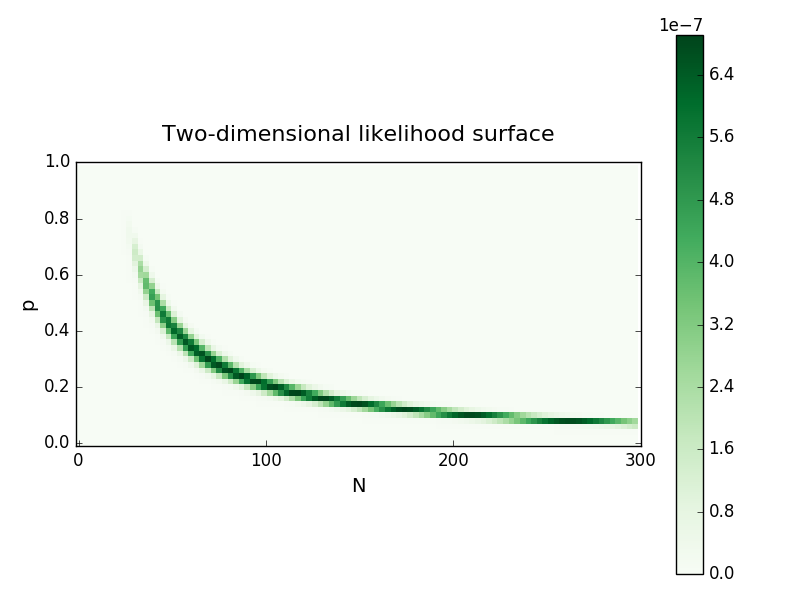

In [277]:
fig,ax = plt.subplots()

cax = ax.matshow(L.T,cmap=plt.cm.Greens,interpolation='none',origin='lower')
c = fig.colorbar(cax,ax=ax)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(0,100,33.33333))
ax.set_xticklabels(range(0,310,100))

ax.set_yticks(range(0,60,10))
ax.set_yticklabels(np.arange(0,1.2,0.2))
ax.set_xlabel('N',fontsize=14)
ax.set_ylabel('p',fontsize=14)
ax.set_title('Two-dimensional likelihood surface',fontsize=16)

plt.tight_layout()
plt.savefig('2D_Likelihood.png', format='png')
Image('2D_Likelihood.png')

In [222]:
def chooseln(N, k):
      return special.gammaln(N+1) - special.gammaln(N-k+1) - special.gammaln(k+1)

In [242]:
def uniform_likelihood(s,N):
    T = np.sum(s)
    k = len(s)
    if N >= s.max():
        l = np.sum([chooseln(N,n) for n in s]) + special.gammaln(k*N -T + 1) - special.gammaln(k*N + 2)
        return np.exp(l)
    else:
        return 0

def profile_likelihood(s,N):
    T = np.sum(s)
    k = len(s)
    p_hat = T/(k*N)
    if N >= s.max():
        #l = np.sum([chooseln(N,n) for n in s]) + T*np.log(p_hat) + (N*k - T)*np.log(1 - p_hat)
        return np.prod(comb(N,s)) * p_hat**T * (1 - p_hat)**(N*k - T)
    else:
        return 0

def conditional_likelihood(s,N):
    T = np.sum(s)
    k = len(s)
    if N >= s.max():
        l = np.sum([chooseln(N,n) for n in s]) - chooseln(N*k,T)
        return np.exp(l) #np.prod(comb(N, s)) / comb(N*k, T)
    else:
        return 0

In [260]:
N = np.linspace(1,300,100)
L_p = np.zeros(len(N))
L_c = np.zeros(len(N))
L_u = np.zeros(len(N))

for i in range(len(N)):
    L_p[i] = profile_likelihood(s,N[i])
    L_c[i] = conditional_likelihood(s,N[i])
    L_u[i] = uniform_likelihood(s,N[i])
    
L_p = L_p/L_p.max()
L_c = L_c/L_c.max()
L_u = L_u/L_u.max()

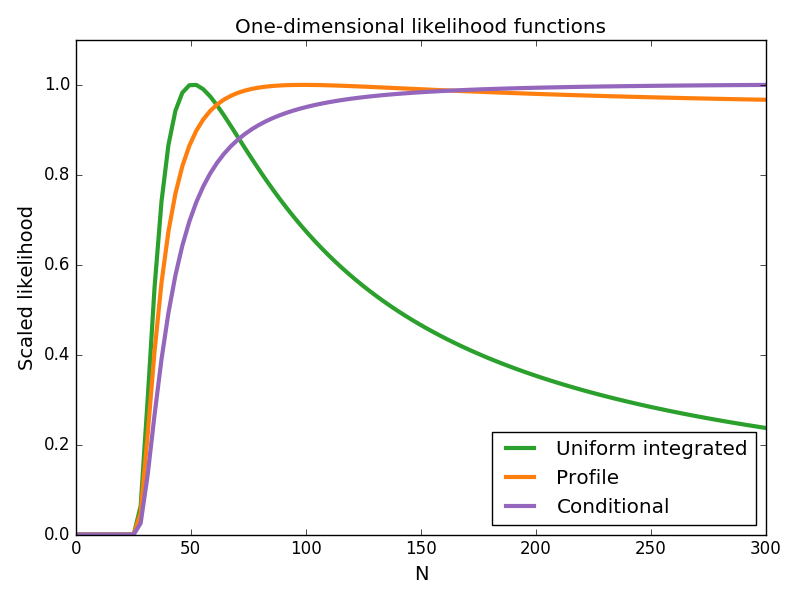

In [261]:
# These are the "Tableau" colors as RGB. I've chosen my faves. 
# In order: blue, green, purple, orange. 
# Scaling the RGB values to the [0, 1] range, which is the format matplotlib accepts. 
tableau4 = [(31, 119, 180),(44, 160, 44),(148,103,189),(255, 127, 14)]
for i in range(len(tableau4)):    
    r, g, b = tableau4[i]    
    tableau4[i] = (r / 255., g / 255., b / 255.)

plt.clf()
plt.plot(N,L_u,linewidth=3,color=tableau4[1])
plt.plot(N,L_p,linewidth=3,color=tableau4[3])
plt.plot(N,L_c,linewidth=3,color=tableau4[2])

plt.ylim((0,1.1))
plt.ylabel('Scaled likelihood',fontsize=14)
plt.xlabel('N',fontsize=14)
plt.legend(('Uniform integrated','Profile','Conditional'), loc = 4)
plt.title('One-dimensional likelihood functions')

plt.tight_layout()
plt.savefig('1D_likelihoods.png',format='png')
Image('1D_likelihoods.png')